<a href="https://colab.research.google.com/github/GUC-DM/w24-mini-project-1-farah-ahmed-t10-malak-amgad-t10/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


here we were viewing the data types of the columns for better understanding

In [3]:
df['vin'].is_unique


True

here we made sure that vin is not duplicated, bec vin is supposed to be a unique value

In [4]:
df.duplicated().sum()

0

Here we were checking if there are duplicated rows, to drop them if found

In [5]:
df_filtered = df.loc[df['body'].str.lower().str.contains('cab', na=False)]
df_filtered

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
6,2007,Chevrolet,Avalanche,LS,Crew Cab,automatic,3gnfk12387g117727,wa,3.6,100676.0mi,gray,black,lexus of tacoma at fife,$13600,Wed Jan 21 2015 05:20:00 GMT-0800 (PST)
14,2011,Ford,Ranger,XL,Regular Cab,automatic,1ftkr1ad1bpa53158,ne,1.7,126980.0mi,white,black,ari,$3700,Thu Jan 08 2015 12:15:00 GMT-0800 (PST)
16,2008,Toyota,Tundra,SR5,Double Cab,automatic,5tbrt54188s460149,fl,2.7,273881.0mi,gray,black,onemain rem/cars under 5000,$7300,Fri May 22 2015 02:20:00 GMT-0700 (PDT)
29,2013,Toyota,Tacoma,PreRunner V6,Double Cab,automatic,3tmju4gn8dm146781,fl,5.0,8972.0mi,blue,gray,toyota motor sales usa inc/buyback,$23000,Tue Jan 27 2015 01:30:00 GMT-0800 (PST)
39,2008,Ford,F-350 Super Duty,Lariat,Crew Cab,automatic,1ftww31rx8eb60067,tx,4.7,86031.0mi,blue,black,rlb investments,$25000,Wed Dec 31 2014 10:20:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46477,2013,Chevrolet,Silverado 1500,LT,Crew Cab,automatic,3gcpkse76dg241153,ca,3.9,53213.0mi,silver,gray,reliance motors llc,$27600,Thu Feb 19 2015 04:00:00 GMT-0800 (PST)
46488,2012,Ram,1500,ST,Crew Cab,automatic,1c6rd7kt3cs239621,tx,3.5,32132.0mi,black,gray,exeter finance corp,$25700,Tue Feb 03 2015 02:30:00 GMT-0800 (PST)
46492,2010,Toyota,Tundra,Limited,CrewMax Cab,automatic,5tfhw5f14ax145985,ga,2.8,57003.0mi,black,brown,sossa pre owned,$25400,Thu Mar 05 2015 02:00:00 GMT-0800 (PST)
46515,2011,Ford,Ranger,XL,SuperCab,automatic,1ftkr1ed8bpa08664,mi,4.4,87938.0mi,white,black,sutton leasing inc,$6900,Thu Feb 19 2015 11:00:00 GMT-0800 (PST)


checking if the keyword for pickup trucks is "cab"

In [6]:
columns_to_check = ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin',
                    'state', 'condition', 'odometer', 'color', 'interior', 'seller',
                    'sellingprice', 'saledate']

for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'year':
[2013 2014 2012 2002 2007 2008 2011 2015 2010 2005 2006 2009 2004 1998
 2001 2003 1996 1997 2000 1999 1995 1991 1990 1994 1993 1992]


Unique values in 'make':
['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']


Unique values in 'model':
['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser

Here we were checking the unique values of each column to determine if there are any null, missing or blank values in order to remove them if found.

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [7]:
df['sellingprice'] = df['sellingprice'].str.extract(r'(\d+)', expand=False)

here we extract numeric value for the attribute. (removed the dollar sign from the selling price so we can turn it into numeric to be able to do linear regression which takes only numeric values)

In [8]:
df['sellingprice'] = df['sellingprice'].astype(float)
df


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


here we changed the selling price from object data type to float

In [9]:
df = df.rename(columns={'sellingprice':'sellingprice($)'})

here we changed the name of the column sellingprice to sellingprice($) for better representating indicating that it's unit is dollar sign

In [10]:
df['odometer'] = df['odometer'].str.extract(r'(\d+(.\d+)?)', expand=False)[0]
df = df.rename(columns={'odometer':'odometer(mi)'})

here we extract numeric value for the attribute. (removed the mi from the odometer so we can turn it into numeric to be able to do linear regression which takes only numeric values) and renamed it for better representating indicating that it's unit is miles

In [11]:
df['odometer(mi)'] = df['odometer(mi)'].astype(float)

we changed the data type of odometer from object to float

In [12]:
df = df.rename(columns={'color':'exterior'})

we changed the header name from color to exterior for better understanding

In [13]:
for index, row in df.iterrows():
    body_value = row['body'].lower()

    if 'sedan' in body_value:
        df.at[index, 'body'] = 'Sedan'
    elif 'coupe' in body_value or 'oup' in body_value:
        df.at[index, 'body'] = 'Coupe'
    elif 'convertible' in body_value:
        df.at[index, 'body'] = 'Convertible'
    elif 'hatchback' in body_value:
        df.at[index, 'body'] = 'Hatchback'
    elif 'suv' in body_value:
        df.at[index, 'body'] = 'SUV'
    elif 'van' in body_value:
        df.at[index, 'body'] = 'Minivan'
    elif 'wagon' in body_value:
        df.at[index, 'body'] = 'Wagon'
    elif 'cab' in body_value or 'supercrew' in body_value:
        df.at[index, 'body'] = 'Pickup Truck'

Here we reduced the values in 'body' into several types to be easier to categorize. This was done by searching by certain keywords that were inferred through inspection and then replacing them with the main types that are required in the document.

In [14]:
body_types = ['Sedan', 'Coupe', 'Convertible', 'Hatchback', 'SUV',
              'Minivan', 'Wagon', 'Pickup Truck']

invalid_body_df = df[~df['body'].isin(body_types)]
invalid_body_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer(mi),exterior,interior,seller,sellingprice($),saledate


Here we were checking that all values got reduced.

In [15]:
most_frequent_color = {}

for make in df['make'].unique():
    subset = df[df['make'] == make]

    mode_color = subset['interior'].mode()[0]
    most_frequent_color[make] = mode_color

result_df = pd.DataFrame(most_frequent_color.items(), columns=['Make', 'Most Frequent Interior Color'])

result_df

,Make,Most Frequent Interior Color
0,Hyundai,gray
1,Toyota,gray
2,Lexus,black
3,BMW,black
4,Ford,black
5,Kia,black
6,Chevrolet,black
7,Cadillac,black
8,Mercedes-Benz,black
9,Jeep,black


Here we are getting the most frequent interior color for each car "make" to use it in filling the missing values in 'interior'

In [16]:
for make, color in most_frequent_color.items():
    df.loc[(df['make'] == make) & (df['interior'] == '—'), 'interior'] = color

here we substituted the "-" missing value  in the interior column with the color mode that corresponds to the 'make' column in each row. meaning, for each missing value in interior, we replaced it based on the car brand "make".

In [17]:
most_frequent_color = {}

for make in df['make'].unique():
    subset = df[df['make'] == make]

    mode_color = subset['exterior'].mode()[0]
    most_frequent_color[make] = mode_color

result_df = pd.DataFrame(most_frequent_color.items(), columns=['Make', 'Most Frequent Color'])

result_df

,Make,Most Frequent Color
0,Hyundai,silver
1,Toyota,silver
2,Lexus,black
3,BMW,black
4,Ford,white
5,Kia,silver
6,Chevrolet,white
7,Cadillac,black
8,Mercedes-Benz,black
9,Jeep,black


Here we are getting the most frequent exterior color for each car "make", so we can use it later in replacing the missing values in 'exterior'.

In [18]:
for make, color in most_frequent_color.items():
    df.loc[(df['make'] == make) & (df['exterior'] == '—'), 'exterior'] = color

here we substituted the "-" missing value in the exterior column with the color mode that corresponds to the 'make' column in each row.Meaning, based on the car 'make', we replace the missing value with the most frequent exterior for that 'make'.

In [19]:
temp = df.saledate.str.split(' ', expand=True)
temp

,0,1,2,3,4,5,6
0,Tue,Jun,02,2015,02:30:00,GMT-0700,(PDT)
1,Wed,Feb,18,2015,07:15:00,GMT-0800,(PST)
2,Tue,Jan,20,2015,01:30:00,GMT-0800,(PST)
3,Wed,Mar,04,2015,07:10:00,GMT-0800,(PST)
4,Wed,Feb,18,2015,06:45:00,GMT-0800,(PST)
...,...,...,...,...,...,...,...
46573,Wed,Jan,07,2015,09:30:00,GMT-0800,(PST)
46574,Thu,Jun,18,2015,05:30:00,GMT-0700,(PDT)
46575,Wed,Feb,18,2015,02:00:00,GMT-0800,(PST)
46576,Wed,Jan,14,2015,04:30:00,GMT-0800,(PST)


We were splitting the sale date to day, month, date, year, time, gmt, pt, so there is no multi values in one column

In [20]:
temp.columns = ['SaleDay', 'SaleMonth', 'SaleDate', 'SaleYear', 'Time' ,'GMT','PT' ]

In [21]:
df = pd.concat([df, temp], axis=1)

Here we concatenated the splitted columns to our dataframe

In [22]:
df = df.drop('saledate', axis=1)


Here we dropped the saledate column

In [23]:

df['SaleTime'] = df['Time'] + ' ' + df['GMT'] + ' ' + df['PT']



we then aggregated the time, gmt, pt into one column namely saletime

In [24]:
df = df.drop('Time', axis=1)
df = df.drop('GMT', axis=1)
df = df.drop('PT', axis=1)

we then dropped the three columns

In [25]:
df = df.drop(columns=['vin'])
df = df.drop(columns=['SaleDay'])
df = df.drop(columns=['SaleMonth'])
df = df.drop(columns=['SaleDate'])
df = df.drop(columns=['SaleYear'])
df = df.drop(columns=['SaleTime'])
df = df.drop(columns=['seller'])

df.head()


,year,make,model,trim,body,transmission,state,condition,odometer(mi),exterior,interior,sellingprice($)
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,ma,3.9,50404.0,black,gray,10900.0
1,2014,Toyota,4Runner,SR5,SUV,automatic,fl,4.9,17846.0,gray,gray,29900.0
2,2012,Lexus,IS 250,Base,Sedan,automatic,fl,4.1,21122.0,silver,black,24200.0
3,2002,BMW,X5,4.4i,SUV,automatic,fl,1.9,145303.0,black,black,3200.0
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,wa,4.9,6714.0,white,gray,22100.0


Dropped the column seller, vin and saledate because it is the id and selling date of the car which will not affect the selling price meaning that if a car has id 1 or sold on the 10th of november this does not make it any higher or lower.
the name of the seller should'nt affect the selling price as it's not something that has to do with the car features.

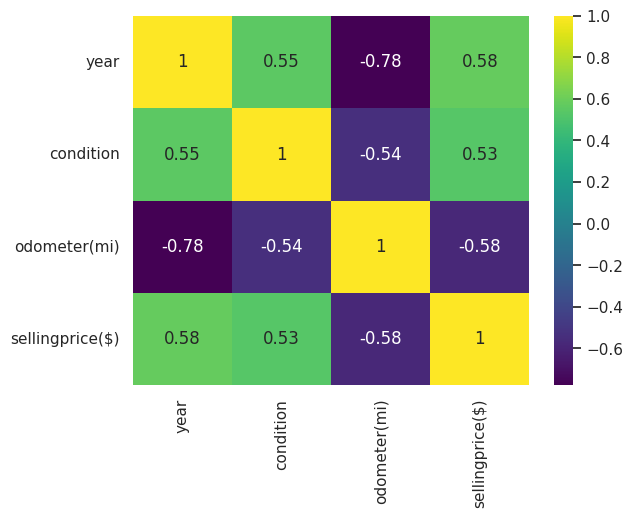

In [26]:

corr = df.corr(numeric_only=True)
corr
corr['sellingprice($)'].sort_values(ascending=False, key=lambda x: x.abs())
sns.heatmap(corr, cmap='viridis', annot = True);

Here we are checking the correlation between all numeric values to understand the relationships between them to identify if any columns needs to be dropped.

## Exploratory Data Analysis


**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

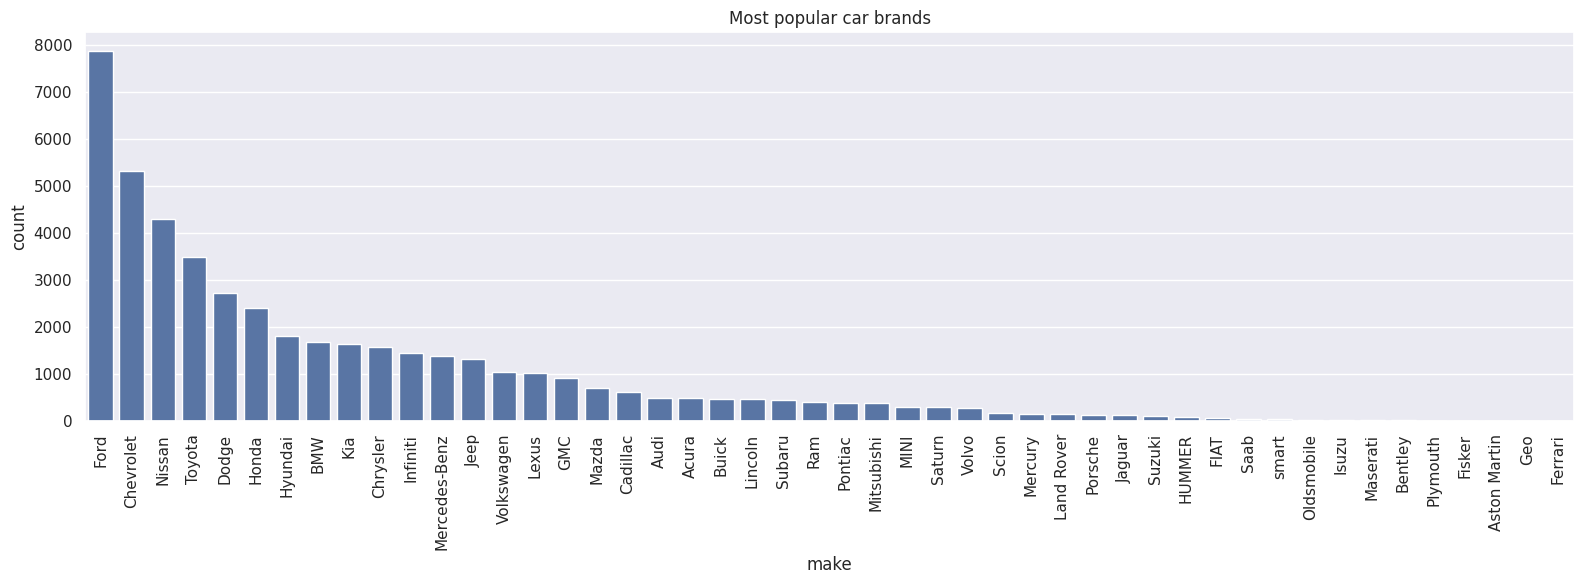

In [27]:


large_to_small = df.groupby('make').size().sort_values(ascending=False)

plt.figure(figsize=(16, 6))

sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


**Answer for Q1**: Ford, Chevrolet and Nissan since they have the largest count

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

<ipython-input-28-db543a35b624>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='transmission',


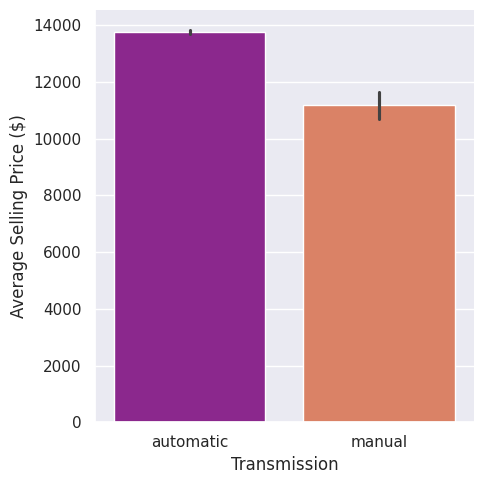

In [28]:


g = sns.catplot(x='transmission',
                y='sellingprice($)',
                kind='bar',
                palette='plasma',
                estimator=np.mean,
                data=df)

g.set_axis_labels("Transmission", "Average Selling Price ($)")

plt.show()



**Answer for Q2**: Yes, automatic cars average selling price is shown to be higher than manual cars as for automatic it reaches almost 14000 on average and for the manual cars it reaches almost 11000 on average

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

<ipython-input-29-b544e5ab4718>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='make', y='sellingprice($)', data=df, palette='Wistia', ax=ax)


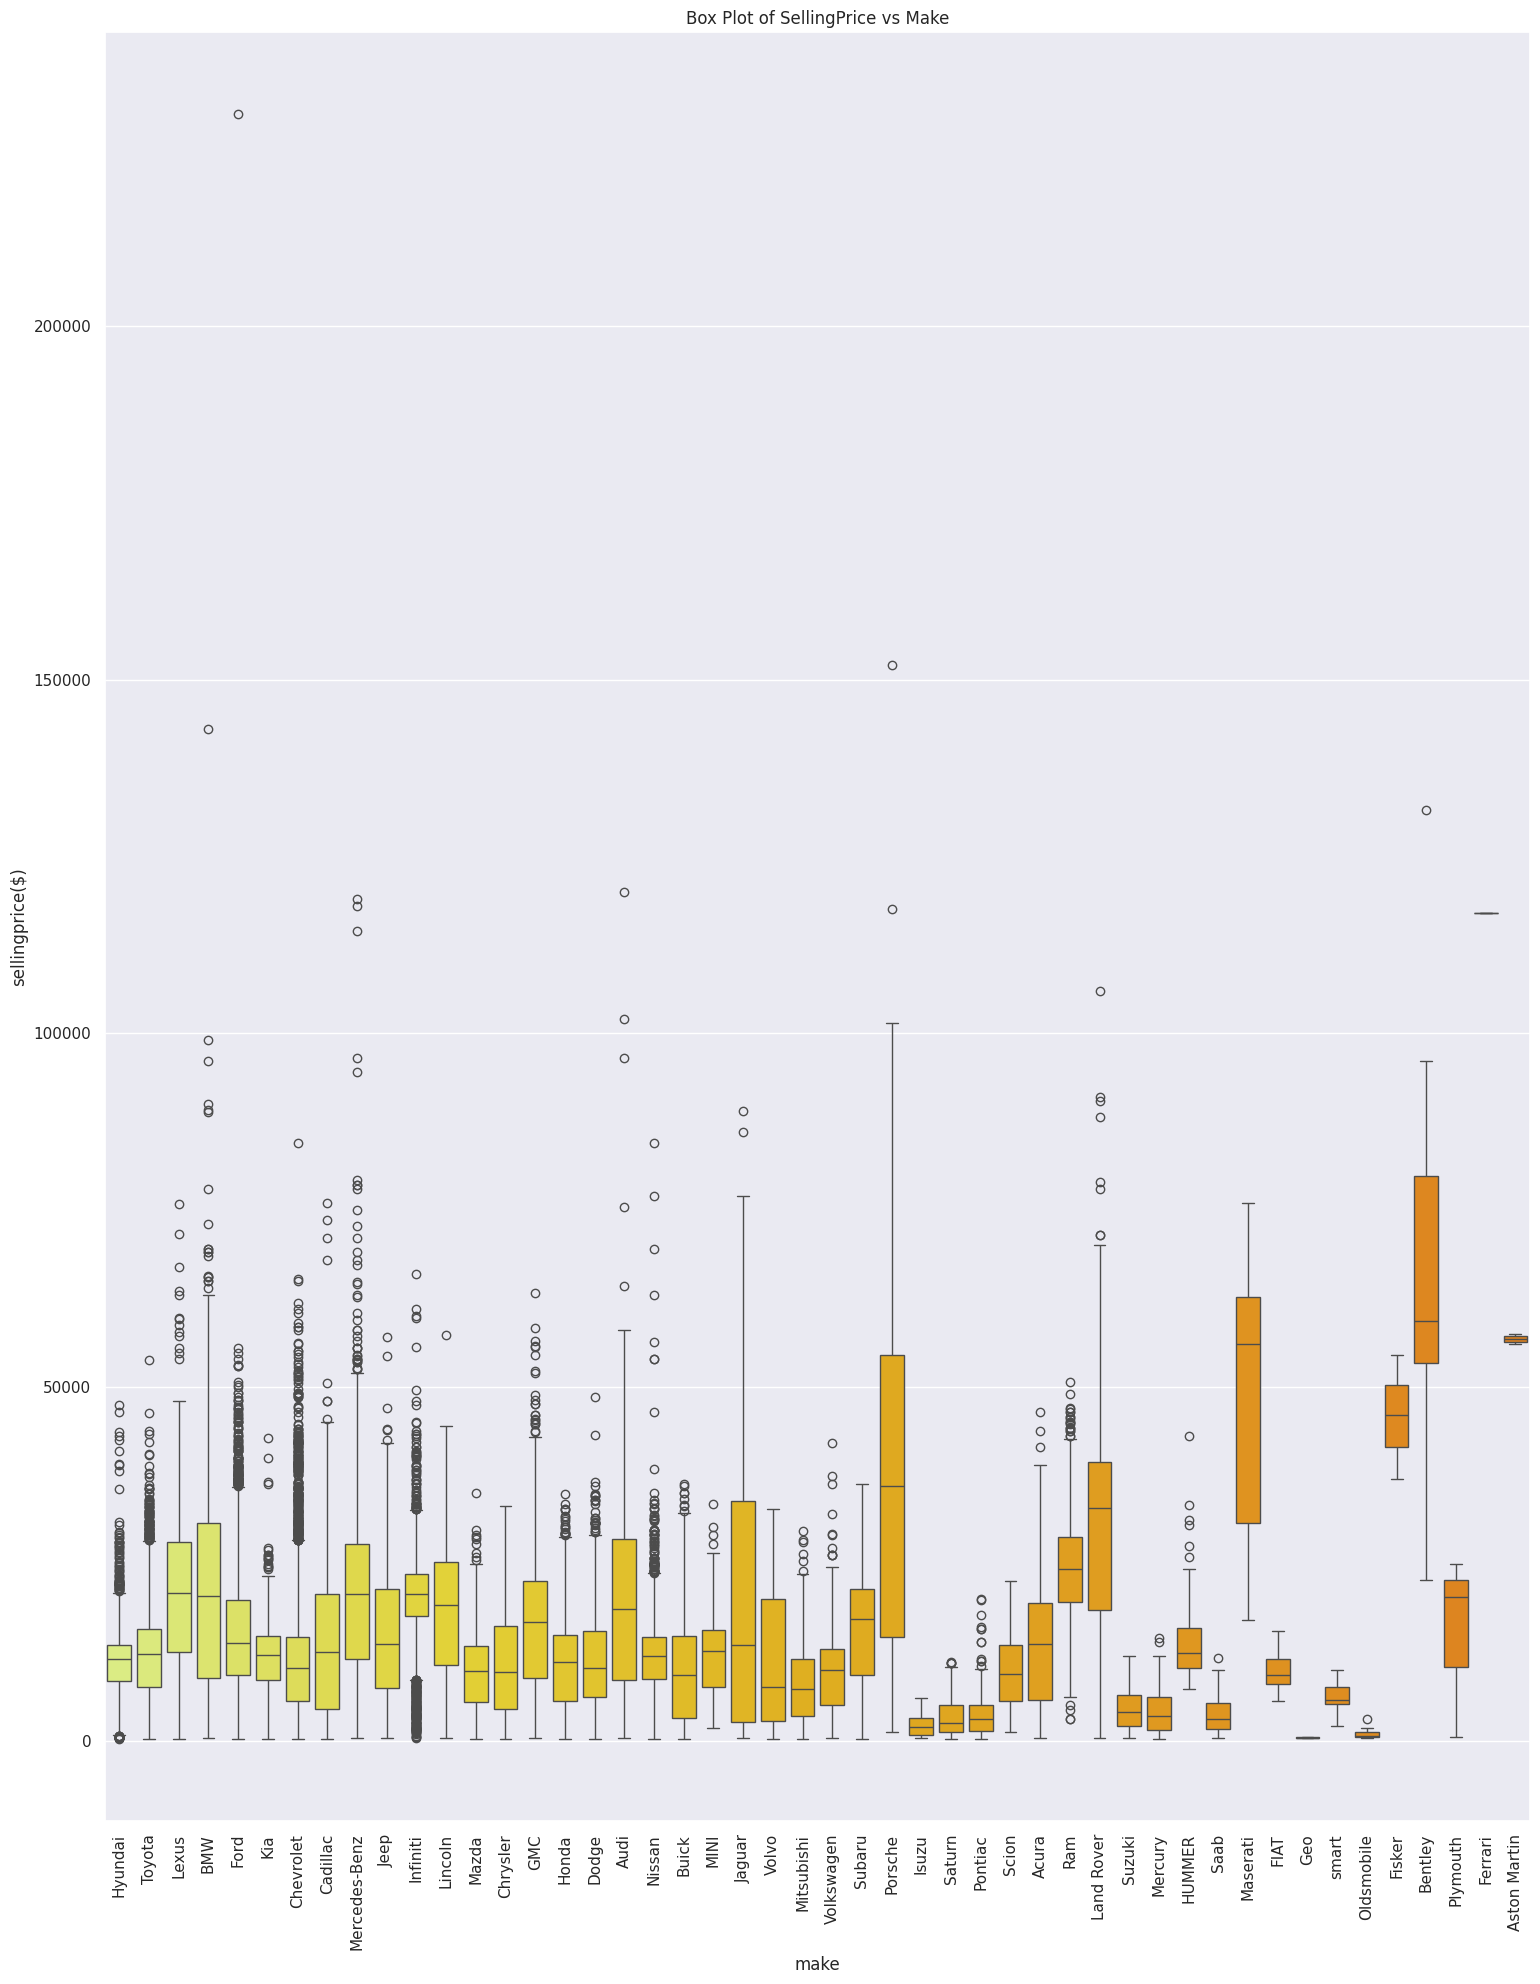

In [29]:
f = plt.figure(figsize=(30, 20))
ax = f.add_subplot(121)

sns.boxplot(x='make', y='sellingprice($)', data=df, palette='Wistia', ax=ax)

ax.set_title('Box Plot of SellingPrice vs Make')

plt.xticks(rotation=90)

plt.tight_layout()

plt.show()


**Answer for Q3**: widest distribution are Porshe and Maserati, and the most expensive are Ferrari and Bently

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

<ipython-input-30-45d754bbd66d>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='odometer(mi)', y='sellingprice($)', data=df, palette='magma', ax=ax)


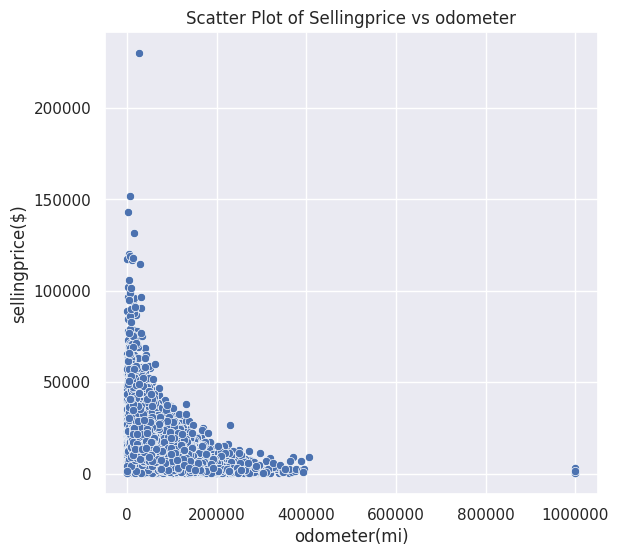

In [30]:
import matplotlib.ticker as mticker

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)

sns.scatterplot(x='odometer(mi)', y='sellingprice($)', data=df, palette='magma', ax=ax)

ax.set_title('Scatter Plot of Sellingprice vs odometer')

ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(useOffset=False, style='plain', axis='x')

plt.show()


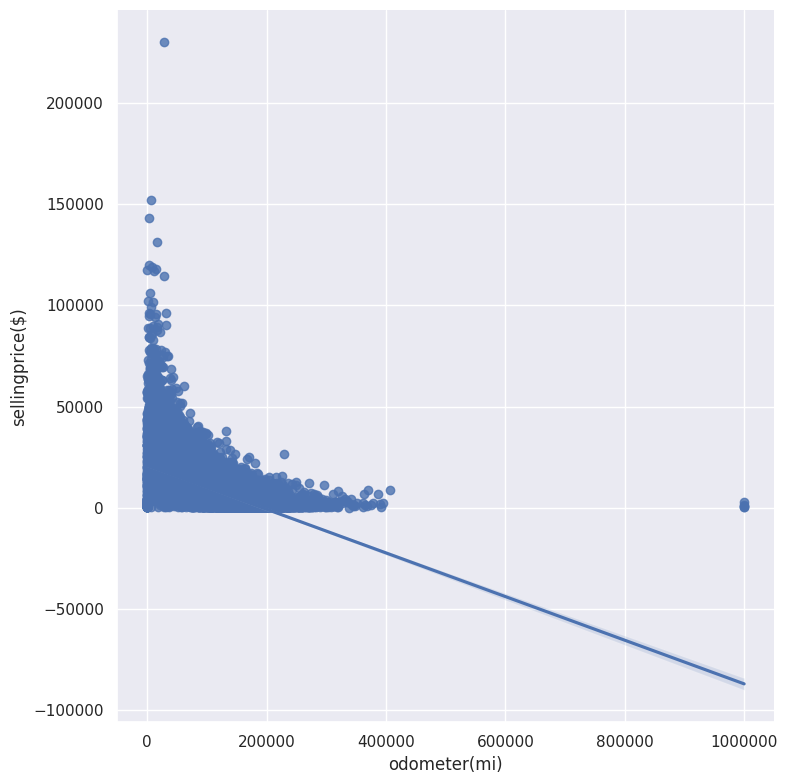

In [31]:

sns.lmplot(x='odometer(mi)', y='sellingprice($)', data=df, palette='magma', height=8)

ax = plt.gca()

ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax.ticklabel_format(useOffset=False, style='plain', axis='x')

plt.show()


[link text](https://)**Answer for Q4**: Negative correlation as there is inverse relationship shown (as odometer miles increases, the selling price decreases)and it shows slightly weak correlation as the slope shown is not that steep.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

<ipython-input-32-f90d3a0d0ac3>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='condition', y='sellingprice($)', data=df, palette='magma', ax=ax)


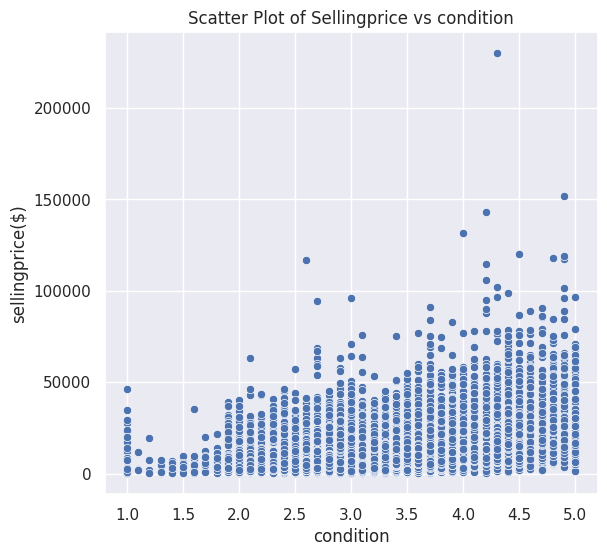

In [32]:

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)

sns.scatterplot(x='condition', y='sellingprice($)', data=df, palette='magma', ax=ax)

ax.set_title('Scatter Plot of Sellingprice vs condition')



plt.show()

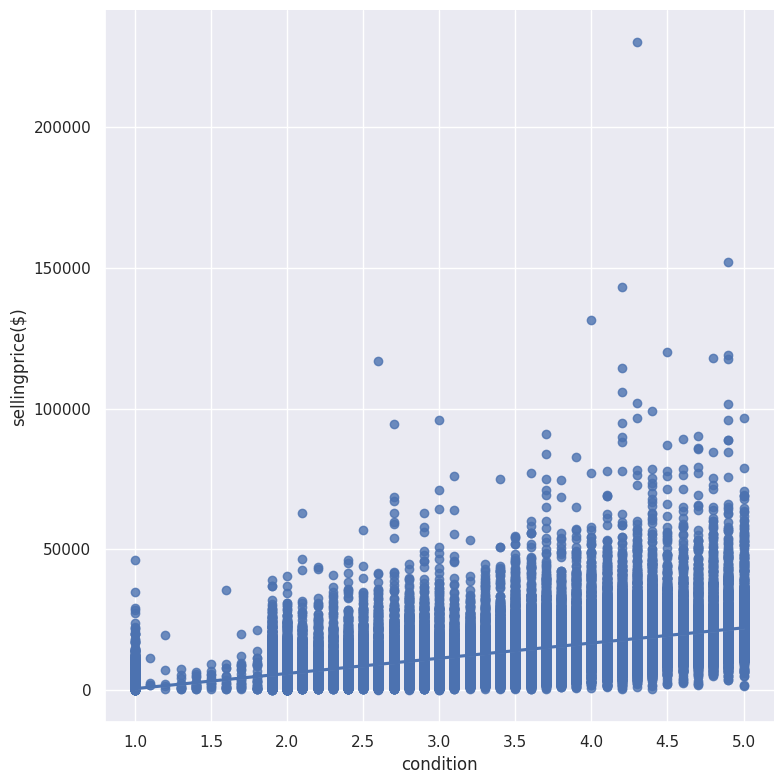

In [33]:
sns.lmplot(x='condition', y='sellingprice($)', data=df, palette='magma', height=8)


**Answer for Q5**: Positive correlation is shown as a direct relationship is visible because as conition rate increases the selling price increases; however,** weak correlation is shown by the non steep slope.**

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

<ipython-input-34-a560186478f0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_price_by_body.index, y='sellingprice($)', data=average_price_by_body, palette='magma')


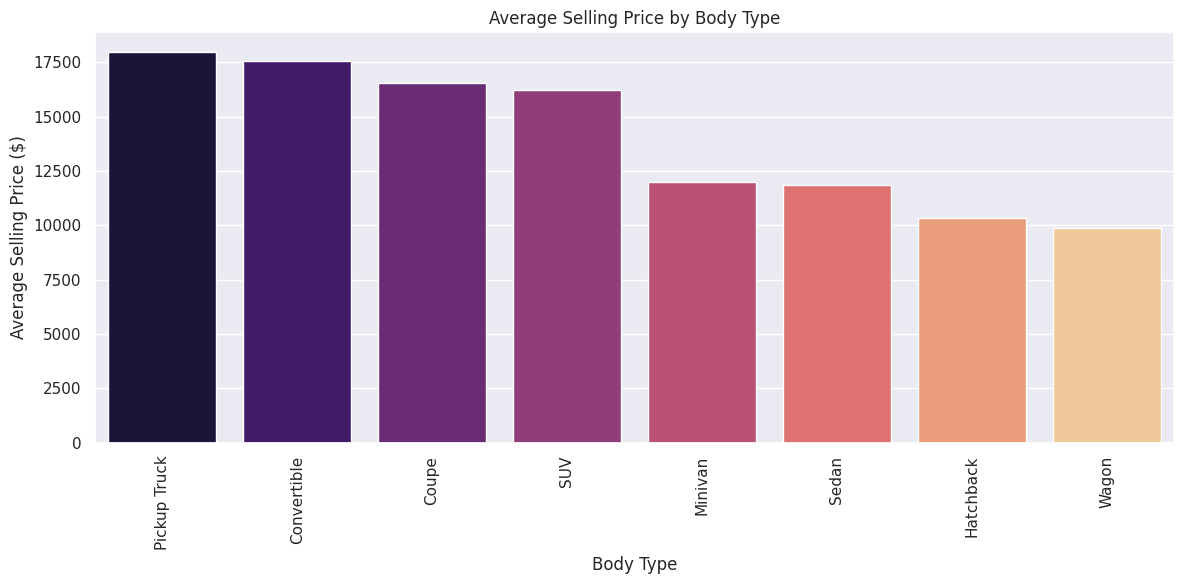

In [34]:

average_price_by_body = df.groupby('body').agg({'sellingprice($)': 'mean'}).sort_values(by='sellingprice($)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_body.index, y='sellingprice($)', data=average_price_by_body, palette='magma')
plt.title('Average Selling Price by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


**Answer for Q6**: Yes, the differences in average car prices due to body type can be shown in the above chart. meaning that as body type differs, the average price differs, so this means that body type affects the average price causing its change. The most expensive is the pickup truck and the least expensive is the wagon.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [35]:

numerical_columns = ['year', 'condition', 'odometer(mi)']

df[numerical_columns] = (
    df[numerical_columns] - df[numerical_columns].min()
) / (
    df[numerical_columns].max() - df[numerical_columns].min()
)

df.head()


,year,make,model,trim,body,transmission,state,condition,odometer(mi),exterior,interior,sellingprice($)
0,0.92,Hyundai,Sonata,GLS,Sedan,automatic,ma,0.725,0.050403,black,gray,10900.0
1,0.96,Toyota,4Runner,SR5,SUV,automatic,fl,0.975,0.017845,gray,gray,29900.0
2,0.88,Lexus,IS 250,Base,Sedan,automatic,fl,0.775,0.021121,silver,black,24200.0
3,0.48,BMW,X5,4.4i,SUV,automatic,fl,0.225,0.145302,black,black,3200.0
4,0.96,Ford,E-Series Van,E-250,Minivan,automatic,wa,0.975,0.006713,white,gray,22100.0


We normalised the numeric columns to lie between a range of 0 to 1 such that we can accurately and fairly compare between them so they are all between the same range.

In [36]:
categorical_columns = ['make', 'model', 'trim', 'body', 'state', 'exterior', 'interior', 'transmission']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'state' 'condition'
 'odometer(mi)' 'exterior' 'interior' 'sellingprice($)']

Number of rows and columns in the dataset: (46578, 12)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer(mi)' ... 'interior_white' 'interior_yellow'
 'transmission_manual']

Number of rows and columns in the dataset: (46578, 1868)


Here we converted all categorical attributes into numeric using one hot encoding such that we can build the linear regression model beacuse linear regression only works with numerics

In [37]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer(mi),exterior,interior,sellingprice($)
0,0.92,Hyundai,Sonata,GLS,Sedan,automatic,ma,0.725,0.050403,black,gray,10900.0
1,0.96,Toyota,4Runner,SR5,SUV,automatic,fl,0.975,0.017845,gray,gray,29900.0
2,0.88,Lexus,IS 250,Base,Sedan,automatic,fl,0.775,0.021121,silver,black,24200.0
3,0.48,BMW,X5,4.4i,SUV,automatic,fl,0.225,0.145302,black,black,3200.0
4,0.96,Ford,E-Series Van,E-250,Minivan,automatic,wa,0.975,0.006713,white,gray,22100.0


## Modelling

_Apply the linear regression model below._

In [38]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice($)',axis=1) # Independent variable
y = df_encode['sellingprice($)'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


Here we splitted the data to test data and training data to use the training data to build the model and the test data for evaluation. We splitted them to 80% training and 20% testing.

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

Here we built the model using the training data. Meaning that we are feeding it the training data to build the model.

In [40]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,2881.476491
1,theta_1,year,25349.410971
2,theta_2,condition,5102.844343
3,theta_3,odometer(mi),-43944.001053
4,theta_4,make_Aston Martin,18228.609152
...,...,...,...
1863,theta_1863,interior_silver,-631.332125
1864,theta_1864,interior_tan,-130.795281
1865,theta_1865,interior_white,-995.695319
1866,theta_1866,interior_yellow,10707.241476


In [41]:
df

,year,make,model,trim,body,transmission,state,condition,odometer(mi),exterior,interior,sellingprice($)
0,0.92,Hyundai,Sonata,GLS,Sedan,automatic,ma,0.725,0.050403,black,gray,10900.0
1,0.96,Toyota,4Runner,SR5,SUV,automatic,fl,0.975,0.017845,gray,gray,29900.0
2,0.88,Lexus,IS 250,Base,Sedan,automatic,fl,0.775,0.021121,silver,black,24200.0
3,0.48,BMW,X5,4.4i,SUV,automatic,fl,0.225,0.145302,black,black,3200.0
4,0.96,Ford,E-Series Van,E-250,Minivan,automatic,wa,0.975,0.006713,white,gray,22100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46573,0.92,Ford,Edge,SE,SUV,automatic,va,0.625,0.052843,white,gray,17000.0
46574,0.88,Infiniti,G Sedan,G37 Journey,Sedan,automatic,ca,0.875,0.023184,black,black,21500.0
46575,0.92,BMW,3 Series,328i,Sedan,automatic,tx,0.800,0.045356,white,beige,22000.0
46576,0.92,Toyota,Camry,LE,Sedan,automatic,ca,0.625,0.043375,black,beige,13800.0


Here we are viewing the weights of each column as well as the y-intercept for the linear regresion model equation.

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [42]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation

#If you are using a local python notebook uncomment the RMSE line below and run
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(y_pred, y_test, squared=False)

#If you are using a cloud python notebook run the below RSME line
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3539.2547324560846
R^2 obtained is: 0.8644182066981834


Here we are evaluating the model by checking the root mean square error to represents the difference between the predicted values and the actual values.
and R squared to represent the variance of the dependant variable that can be explained by variation in the independent variables

In [43]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.4752141673292696
The median absolute error (MAE) is:  1391.4238848484383


Here we are evaluating using the mean absolute percentage error to measure the accuracy of the model and represents the mean percentage error between the predicted and the actual
and the median absolute error to measure the absolute difference between the prediction and the actual.

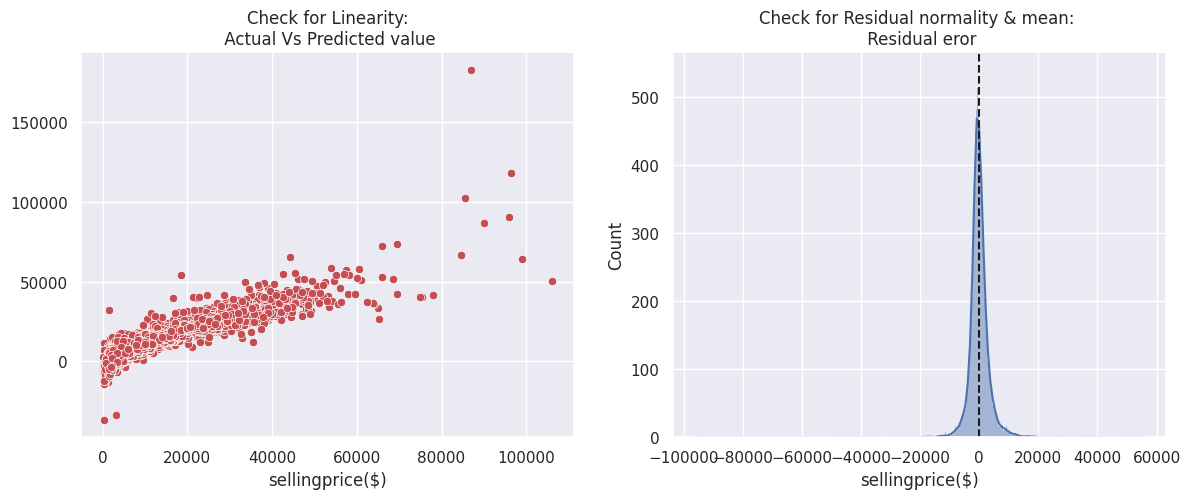

In [44]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

The model generally has good performance when it comes to low and moderate selling prices. However, when it comes to higher ones, more variations are visible.
For the residual graph, the residuals are shown to be centered around zero which is good, yet outliers still exist which might result in some skewness and inaccuracy.

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:
R^2 is high enough to show that a big portion of the selling price variations can be explained by the variations in car characteristics.

The root mean square error, however, can be considered moderate based on the price range which starts from 150 to 230000.

However, the MAPE, shows that there might be some issues when it comes to handling certain cases as the higher extremes. This shown by 47.52% deviation between the actual and predicted selling prices.

This problem can be because of outliers which results in disproportionality and higher errors. Thus, outliers need to be handled, which will be shown in the coming section, to overcome this problem.

Thus, since the error is relatively high, we can not base our decsions based on this model, not in its current state. However, It just gives an overview about the effect of car characteristics on the selling price.

# Bonus


In [45]:
df['transmission_encode'] = df['transmission'].map(df['transmission'].value_counts())


Here we encoded the transmission using frequency encoding where each value is replaced with its frequency of occurence. Such that we give more importance to those which constitue the majority of the data set

In [46]:
threshold = 0.01  # 1%

category_counts = df['model'].value_counts(normalize=True)

categories_to_keep = category_counts[category_counts >= threshold].index

df_filtered = df[df['model'].isin(categories_to_keep)]



category_counts = df_filtered['body'].value_counts(normalize=True)

categories_to_keep = category_counts[category_counts >= threshold].index

df_filteredd = df_filtered[df_filtered['body'].isin(categories_to_keep)]





category_counts = df_filteredd['make'].value_counts(normalize=True)

categories_to_keep = category_counts[category_counts >= threshold].index

df_filtereddd = df_filteredd[df_filteredd['make'].isin(categories_to_keep)]

Here we removed the outliers of the categorical columns (make, model and body) by specifying a threshold of 1 % where if a value in these columns occur less than 1 % of the data, it is considered an outlier and the row is removed (filtered). Because if they do not occur that much, probably they will skew the model as the model might need more trainings to predict accurately for these values.

In [47]:
Q1 = df_filtereddd['year'].quantile(0.25)
Q3 = df_filtereddd['year'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_filtereddd[(df_filtereddd['year'] >= lower_bound) & (df_filtereddd['year'] <= upper_bound)]




Q1 = df_no_outliers ['odometer(mi)'].quantile(0.25)
Q3 = df_no_outliers['odometer(mi)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers2 = df_no_outliers[(df_no_outliers['odometer(mi)'] >= lower_bound) & (df_no_outliers['odometer(mi)'] <= upper_bound)]




Q1 = df_no_outliers2 ['condition'].quantile(0.25)
Q3 = df_no_outliers2['condition'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers3 = df_no_outliers2[(df_no_outliers2['condition'] >= lower_bound) & (df_no_outliers2['condition'] <= upper_bound)]

Here we used the interquartile range method discussed in the lecture to remove the outliers in the numerical columns to prevent model skewness.

We chose the columns to remove the outliers from based on trial and error.

In [48]:

df_no_outliers3 = df_no_outliers3.drop(columns=['transmission'])



In [49]:
categorical_columns = ['model','trim', 'interior', 'exterior', 'body', 'make', 'state']
df_encodee = pd.get_dummies(data=df_no_outliers3,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df_no_outliers3.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encodee.shape)

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'state' 'condition'
 'odometer(mi)' 'exterior' 'interior' 'sellingprice($)'
 'transmission_encode']

Number of rows and columns in the dataset: (14367, 12)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer(mi)' ... 'interior_white' 'interior_yellow'
 'transmission_manual']

Number of rows and columns in the dataset: (14367, 235)


Encoded the categorical columns after removing the outliers to convert them to numeric to use it in the linear regression model.

In [50]:
from sklearn.model_selection import train_test_split

x = df_encodee.drop('sellingprice($)',axis=1) # Independent variable
y = df_encodee['sellingprice($)'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df





Training dataset size: 11493
Testing dataset size: 2874


,parameter,column,theta_value
0,theta_0,y-intersect,484.635502
1,theta_1,year,22872.003688
2,theta_2,condition,4112.268197
3,theta_3,odometer(mi),-61365.502366
4,theta_4,transmission_encode,0.013311
...,...,...,...
230,theta_230,state_tx,-155.405055
231,theta_231,state_ut,-686.393956
232,theta_232,state_va,-337.069702
233,theta_233,state_wa,310.738863


Just as above, here we splitted the dataset into training and testing data and then we used the training data to build the model and displayed the weights of each independent variable as well as the y-intercept.

In [51]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation

#If you are using a local python notebook uncomment the RMSE line below and run
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(y_pred, y_test, squared=False)

#If you are using a cloud python notebook run the below RSME line
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  2025.3258698793663
R^2 obtained is: 0.8881863780896633


In [52]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The mean absolute percentage error (MAPE) is:  0.11539835746111203
The median absolute error (MAE) is:  971.8404872593437


Just as above we calculated the R^2, RMSE, MAPE and MAE to evaluate the performance of the model which will be compared to the previous model at the end of the section.

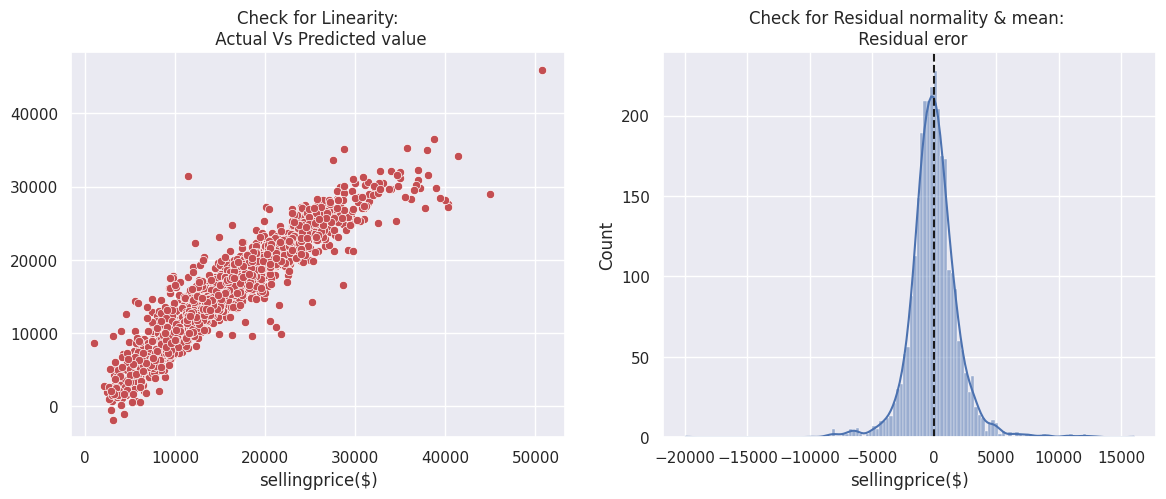

In [53]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');


In the scatter plot, the data points are grouped in the form of a diagonal which means that actual and predicted values are highly aligned.

when it comes to the residuals, they are all around the 0 selling price which indicates accuracy with small errors. It is ,also, normally distrubted as shown by the bell shape curve.

The removal of outliers means that this model handles data way better. It is possible that the old model had biased values towards extreme values and that this made the overall prediction and residuals be damped. Without these outliers, the new model would do a good job of giving better estimates, mainly for normal ranges of cars prices.

This can be shown by the improved MAPE where it decreased to almost 11% which represents way smaller error and deviation between actual and predicted selling prices.
Also, the R^2 increased by almost 2.4% which means that more variance could be explained meaning that explanation for the full range can be achieved.

The overall model improvements after the removal of outliers provide a more accurate prediction, a closer distribution of residuals to normal, and fewer extreme errors.
Such improvement would suggest that the model becomes more reliable to estimate prices of used cars.